# Library imports

In [148]:
import tensorflow
import numpy
import IPython
from matplotlib import pyplot
import cv2
import PIL
import os
import random
import pickle
import keras
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.utils import plot_model
import seaborn
# %matplotlib qt
%matplotlib inline

# Data imports

In [4]:
classes_list=['Facial acne', 'Melanoma', 'Psoriasis', 'Ringworm']
def printClassList():
    for class_name in classes_list:
        print(f"{classes_list.index(class_name)} -->  {class_name}")
printClassList()   
def getClassvalue(index):
    print(classes_list[index])

0 -->  Facial acne
1 -->  Melanoma
2 -->  Psoriasis
3 -->  Ringworm


In [15]:
loaded_pickle_features=open("../Data/objects/pickle_fetures.pickle","rb")
Training_Features=pickle.load(loaded_pickle_features)
loaded_pickle_features.close()
loaded_pickle_labels=open("../Data/objects/pickle_labels.pickle","rb")
Training_Labels=pickle.load(loaded_pickle_labels)
loaded_pickle_labels.close()

In [16]:
loaded_pickle_testing_features=open("../Data/objects/pickle_testing_fetures.pickle","rb")
Testing_Features=pickle.load(loaded_pickle_testing_features)
loaded_pickle_testing_features.close()
loaded_pickle_testing_labels=open("../Data/objects/pickle_testing_labels.pickle","rb")
Testing_Labels=pickle.load(loaded_pickle_testing_labels)
loaded_pickle_testing_labels.close()

In [17]:
Testing_Features

array([[[173, 158, 173, ...,  78,  85,  84],
        [163, 163, 165, ...,  74,  73,  88],
        [162, 161, 139, ...,  97,  87,  70],
        ...,
        [178, 147, 131, ..., 112, 101, 106],
        [159, 121, 161, ..., 111, 108, 108],
        [130, 157, 160, ...,  95, 102,  81]],

       [[159, 165, 158, ...,  79,  68,  49],
        [162, 161, 158, ...,  82,  76,  63],
        [166, 167, 161, ...,  81,  80,  75],
        ...,
        [131, 131, 126, ...,  68,  63,  69],
        [127, 129, 124, ...,  73,  69,  75],
        [119, 128, 124, ...,  76,  75,  79]],

       [[119, 123, 139, ...,  26,  22,  20],
        [122, 120, 132, ...,  25,  21,  20],
        [121, 118, 122, ...,  24,  21,  20],
        ...,
        [189, 190, 187, ...,  66,  84,  88],
        [189, 189, 186, ...,  66,  82,  86],
        [188, 189, 185, ...,  67,  80,  85]],

       ...,

       [[159, 169, 169, ..., 147, 147, 147],
        [164, 153, 158, ..., 147, 147, 147],
        [152, 169, 150, ..., 147, 147, 147

In [18]:
Training_Labels

[0,
 3,
 2,
 3,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 2,
 0,
 3,
 1,
 1,
 0,
 2,
 2,
 3,
 3,
 3,
 0,
 2,
 1,
 0,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 1,
 3,
 0,
 3,
 0,
 3,
 0,
 3,
 0,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 1,
 0,
 0,
 1,
 2,
 3,
 0,
 0,
 3,
 3,
 1,
 0,
 0,
 3,
 1,
 3,
 3,
 3,
 1,
 0,
 0,
 2,
 2,
 3,
 1,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 3,
 0,
 1,
 3,
 3,
 0,
 0,
 2,
 2,
 0,
 1,
 1,
 1,
 0,
 3,
 3,
 3,
 0,
 3,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 2,
 3,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 3,
 0,
 0,
 2,
 2,
 3,
 3,
 1,
 3,
 3,
 1,
 2,
 0,
 0,
 2,
 2,
 0,
 3,
 3,
 3,
 2,
 0,
 0,
 0,
 0,
 3,
 3,
 0,
 3,
 1,
 3,
 3,
 3,
 0,
 2,
 2,
 0,
 0,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 0,
 3,
 3,
 0,
 0,
 3,
 0,
 0,
 2,
 3,
 0,
 2,
 0,
 3,
 2,
 3,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 3,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 3,
 3,
 0,
 0,
 3,
 3,
 0,
 1,
 0,
 0,
 3,
 3,
 3,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 3,
 0,
 1,
 3,
 2,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 3,
 3,
 3,
 1,
 3,
 2,
 1,
 0,
 0,


In [19]:
Testing_Features

array([[[173, 158, 173, ...,  78,  85,  84],
        [163, 163, 165, ...,  74,  73,  88],
        [162, 161, 139, ...,  97,  87,  70],
        ...,
        [178, 147, 131, ..., 112, 101, 106],
        [159, 121, 161, ..., 111, 108, 108],
        [130, 157, 160, ...,  95, 102,  81]],

       [[159, 165, 158, ...,  79,  68,  49],
        [162, 161, 158, ...,  82,  76,  63],
        [166, 167, 161, ...,  81,  80,  75],
        ...,
        [131, 131, 126, ...,  68,  63,  69],
        [127, 129, 124, ...,  73,  69,  75],
        [119, 128, 124, ...,  76,  75,  79]],

       [[119, 123, 139, ...,  26,  22,  20],
        [122, 120, 132, ...,  25,  21,  20],
        [121, 118, 122, ...,  24,  21,  20],
        ...,
        [189, 190, 187, ...,  66,  84,  88],
        [189, 189, 186, ...,  66,  82,  86],
        [188, 189, 185, ...,  67,  80,  85]],

       ...,

       [[159, 169, 169, ..., 147, 147, 147],
        [164, 153, 158, ..., 147, 147, 147],
        [152, 169, 150, ..., 147, 147, 147

In [20]:
Testing_Labels

[1,
 0,
 2,
 2,
 0,
 2,
 3,
 0,
 2,
 3,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 3,
 3,
 0,
 2,
 2,
 0,
 0,
 1,
 3,
 3,
 0,
 3,
 2,
 1,
 0,
 3,
 0,
 2,
 3,
 3,
 0,
 0,
 1,
 0,
 0,
 3,
 1,
 2,
 3,
 3,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 1,
 2,
 2,
 2,
 3,
 1,
 1,
 3,
 3,
 1,
 3,
 2,
 2,
 1,
 0,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 0,
 2,
 1,
 2,
 3,
 0,
 3,
 0,
 3,
 1,
 1,
 3,
 2,
 3,
 3,
 1,
 2,
 1,
 1,
 0,
 3,
 1,
 1,
 0,
 0,
 1,
 0,
 2,
 3,
 2,
 3,
 0,
 2,
 2,
 0]

In [21]:
Training_Features.shape

(632, 180, 180)

In [22]:
Testing_Features.shape

(120, 180, 180)

In [23]:
len(Training_Labels)

632

In [24]:
len(Testing_Labels)

120

In [25]:
Training_Features[0].shape

(180, 180)

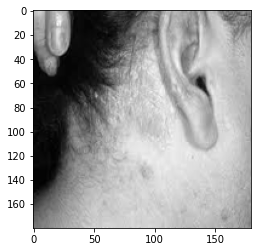

In [26]:
pyplot.imshow(Training_Features[2],cmap='gray')

In [27]:
printClassList()

0 -->  Facial acne
1 -->  Melanoma
2 -->  Psoriasis
3 -->  Ringworm


## Validation Data Creation

In [28]:
Validation_Features=Training_Features[:10]
Training_Features=Training_Features[10:]
Validation_Labels=Training_Labels[:10]
Training_Labels=Training_Labels[10:]

In [29]:
Validation_Features

array([[[ 53,  58,  68, ...,  85,  81,  73],
        [ 55,  60,  68, ...,  83,  82,  74],
        [ 59,  62,  69, ...,  83,  82,  75],
        ...,
        [ 23,  20,  16, ...,  36,  36,  35],
        [ 22,  18,  16, ...,  35,  36,  36],
        [ 21,  18,  15, ...,  35,  36,  36]],

       [[173, 175, 176, ..., 173, 164, 166],
        [173, 175, 176, ..., 171, 181, 181],
        [174, 175, 176, ..., 170, 169, 168],
        ...,
        [175, 175, 175, ..., 156, 161, 161],
        [175, 175, 175, ..., 159, 155, 155],
        [174, 174, 174, ..., 160, 153, 153]],

       [[154, 163, 168, ..., 103, 116, 124],
        [154, 164, 168, ..., 117, 109, 121],
        [155, 163, 168, ..., 113, 100, 117],
        ...,
        [ 98, 104, 102, ..., 123, 109, 117],
        [100, 105, 103, ..., 127, 113, 122],
        [ 96,  98, 101, ..., 126, 125, 121]],

       ...,

       [[ 61,  67,  61, ..., 144, 138, 134],
        [ 71,  71,  64, ..., 146, 140, 136],
        [ 86,  83,  61, ..., 147, 142, 138

In [30]:
Validation_Labels

[0, 3, 2, 3, 0, 1, 0, 0, 0, 3]

In [31]:
Training_Features.shape

(622, 180, 180)

In [32]:
len(Training_Labels)

622

In [33]:
Validation_Features.shape

(10, 180, 180)

In [34]:
len(Validation_Labels)

10

## Dimention expansion

In [35]:
Training_Features=numpy.expand_dims(Training_Features,axis=-1)
Testing_Features=numpy.expand_dims(Testing_Features,axis=-1)
Validation_Features=numpy.expand_dims(Validation_Features,axis=-1)

In [36]:
Training_Features.shape

(622, 180, 180, 1)

In [37]:
Testing_Features.shape

(120, 180, 180, 1)

In [38]:
Validation_Features.shape

(10, 180, 180, 1)

In [39]:
len(Training_Labels)

622

In [40]:
len(Testing_Labels)

120

In [41]:
len(Validation_Labels)

10

## Model Definition

In [108]:
model1_using_only_one_layers=keras.models.Sequential(
     [
         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[180,180,1]),
         keras.layers.MaxPool2D(pool_size=(2,2)),
         keras.layers.Flatten(),
         keras.layers.Dense(units=512,activation='relu'),
         keras.layers.Dense(units=128,activation='relu'),
         keras.layers.Dense(units=4,activation='softmax'),
     ]
 )

In [109]:
model1_using_only_one_layers

In [110]:
model1_using_only_one_layers.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 178, 178, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 253472)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               129778176 
_________________________________________________________________
dense_11 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 516       
Total params: 129,844,676
Trainable params: 129,844,676
Non-trainable params: 0
________________________________________

In [111]:
model1_using_only_one_layers.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [305]:
history1=model1_using_only_one_layers.fit(Training_Features,numpy.array(Training_Labels),epochs=10,verbose=1,validation_data=(Testing_Features,numpy.array(Testing_Labels)))

Epoch 1/10
20/20 [==============================] - 24s 1s/step - loss: 0.1748 - accuracy: 0.9855 - val_loss: 12.7302 - val_accuracy: 0.7250
Epoch 2/10
20/20 [==============================] - 23s 1s/step - loss: 0.1367 - accuracy: 0.9855 - val_loss: 15.6948 - val_accuracy: 0.7417
Epoch 3/10
20/20 [==============================] - 23s 1s/step - loss: 0.3034 - accuracy: 0.9823 - val_loss: 23.4700 - val_accuracy: 0.7000
Epoch 4/10
20/20 [==============================] - 25s 1s/step - loss: 0.0450 - accuracy: 0.9904 - val_loss: 15.9212 - val_accuracy: 0.7167
Epoch 5/10
20/20 [==============================] - 24s 1s/step - loss: 0.0091 - accuracy: 0.9936 - val_loss: 14.8304 - val_accuracy: 0.7333
Epoch 6/10
20/20 [==============================] - 23s 1s/step - loss: 0.1138 - accuracy: 0.9920 - val_loss: 15.0531 - val_accuracy: 0.7250
Epoch 7/10
20/20 [==============================] - 24s 1s/step - loss: 0.0610 - accuracy: 0.9936 - val_loss: 15.1854 - val_accuracy: 0.7417
Epoch 8/10
20

In [303]:
model1_using_only_one_layers.save('./Models/model1_using_only_one_layers.h5')

In [280]:
# trained_model=tensorflow.keras.models.load_model('./Models/model1_using_only_one_layers.h5')
trained_model=model1_using_only_one_layers

In [281]:
prediction=trained_model.predict(numpy.expand_dims(Validation_Features[0],axis=0)).round(5)*100

In [282]:
list(prediction[0])

[100.0, 0.0, 0.0, 0.0]

In [283]:
# numpy.sum(prediction[0])

In [284]:
predicted_classes=list(prediction[0])
sorted_indexes={}
temp_array=[i for i in predicted_classes]
for i in predicted_classes:
    index_value=list(temp_array).index(max(temp_array))
    sorted_indexes.update({index_value:max(temp_array)})
    temp_array[index_value]=-1
# print(temp_array)
print(sorted_indexes.keys())
    

dict_keys([0, 1, 2, 3])


In [285]:
max(prediction[0])

100.0

In [286]:
class_value=list(prediction[0]).index(max(prediction[0]))

In [287]:
class_value

0

In [288]:
for key,value in sorted_indexes.items():
    print(f"{value} % --> ",end="")
    getClassvalue(key)

100.0 % --> Facial acne
0.0 % --> Melanoma
0.0 % --> Psoriasis
0.0 % --> Ringworm


In [289]:
print("Actual class is --> ",end="")
getClassvalue(Validation_Labels[0])

Actual class is --> Facial acne


In [290]:
Training_Features[1]

array([[[174],
        [162],
        [163],
        ...,
        [120],
        [119],
        [119]],

       [[170],
        [169],
        [170],
        ...,
        [122],
        [122],
        [122]],

       [[166],
        [162],
        [158],
        ...,
        [123],
        [124],
        [124]],

       ...,

       [[156],
        [149],
        [148],
        ...,
        [141],
        [160],
        [151]],

       [[157],
        [157],
        [158],
        ...,
        [137],
        [145],
        [148]],

       [[159],
        [160],
        [157],
        ...,
        [141],
        [151],
        [143]]], dtype=uint8)

In [291]:
len(Training_Features)

622

In [292]:
len(Testing_Features)

120

In [293]:
Predeicted_test_data=trained_model.predict(Testing_Features)

In [294]:
Predeicted_test_data

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [2.7113282e-26, 0.0000000e+00, 1.0000000e+00, 1.0159353e-12],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 3.6482170e-31, 1.2364915e-27],
       [1.1096110e-34, 5.6375008e-26, 1.0000000e+00, 8.2973931e-20],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2586843e-10],
       [2.0176494e-18, 0.0000000e+00, 1.1942166e-07, 9.9999988e-01],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 4.1393200e-09],
       [1.0000000e+00, 0.0000000e+00, 2.4011818e-08, 1.4958940e-25],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+

In [295]:
predicted_values=[numpy.argmax(result) for result in Predeicted_test_data]

In [296]:
for i in range(len(predicted_values)):
    print(predicted_values[i]," - > ",Testing_Labels[i])

1  - >  1
2  - >  0
2  - >  2
0  - >  2
0  - >  0
2  - >  2
3  - >  3
0  - >  0
2  - >  2
3  - >  3
1  - >  1
2  - >  2
0  - >  0
1  - >  1
2  - >  0
1  - >  1
1  - >  1
0  - >  3
3  - >  3
3  - >  0
2  - >  2
2  - >  2
0  - >  0
0  - >  0
1  - >  1
3  - >  3
0  - >  3
0  - >  0
2  - >  3
3  - >  2
1  - >  1
3  - >  0
3  - >  3
3  - >  0
0  - >  2
3  - >  3
3  - >  3
0  - >  0
0  - >  0
1  - >  1
0  - >  0
0  - >  0
3  - >  3
1  - >  1
3  - >  2
3  - >  3
3  - >  3
2  - >  0
0  - >  0
0  - >  0
2  - >  2
1  - >  1
0  - >  0
1  - >  1
3  - >  0
1  - >  1
2  - >  2
2  - >  2
0  - >  3
0  - >  2
2  - >  3
2  - >  3
2  - >  2
1  - >  1
3  - >  2
3  - >  2
3  - >  2
3  - >  3
1  - >  1
1  - >  1
3  - >  3
3  - >  3
1  - >  1
3  - >  3
0  - >  2
2  - >  2
1  - >  1
0  - >  0
1  - >  1
1  - >  1
1  - >  1
3  - >  2
2  - >  2
1  - >  1
3  - >  3
0  - >  0
2  - >  2
1  - >  1
3  - >  2
2  - >  3
0  - >  0
0  - >  3
0  - >  0
3  - >  3
1  - >  1
1  - >  1
3  - >  3
2  - >  2
3  - >  3
3  - >  3


In [297]:
pyplot.figure('Confusion Matrix')
confusion_matrix_data=confusion_matrix(predicted_values,Testing_Labels)

<Figure size 432x288 with 0 Axes>

In [298]:
confusion_matrix_data

array([[22,  0,  5,  5],
       [ 0, 30,  1,  0],
       [ 4,  0, 17,  4],
       [ 4,  0,  7, 21]], dtype=int64)

<AxesSubplot:>

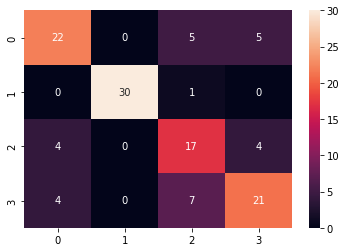

In [299]:
# seaborn.heatmap(confusion_matrix_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
seaborn.heatmap(confusion_matrix_data,annot=True)

In [300]:
printClassList()

0 -->  Facial acne
1 -->  Melanoma
2 -->  Psoriasis
3 -->  Ringworm


In [301]:
classification_report_data=classification_report(predicted_values,Testing_Labels,target_names=classes_list)

In [302]:
print(classification_report_data)

              precision    recall  f1-score   support

 Facial acne       0.73      0.69      0.71        32
    Melanoma       1.00      0.97      0.98        31
   Psoriasis       0.57      0.68      0.62        25
    Ringworm       0.70      0.66      0.68        32

    accuracy                           0.75       120
   macro avg       0.75      0.75      0.75       120
weighted avg       0.76      0.75      0.75       120



## Complex Architecture 1

In [251]:
model2_using_Complex_architecture=keras.models.Sequential(
     [
         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[180,180,1]),
         keras.layers.MaxPool2D(pool_size=(2,2)),
         keras.layers.Conv2D(filters=16,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[180,180,1]),
         keras.layers.MaxPool2D(pool_size=(2,2)),
         keras.layers.Flatten(),
         keras.layers.Dense(units=512,activation='relu'),
         keras.layers.Dense(units=256,activation='relu'),
         keras.layers.Dense(units=64,activation='relu'),
         keras.layers.Dense(units=4,activation='softmax'),
     ]
 )

In [252]:
model2_using_Complex_architecture.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 178, 178, 32)      320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 87, 87, 16)        4624      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 43, 43, 16)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 29584)             0         
_________________________________________________________________
dense_41 (Dense)             (None, 512)               15147520  
_________________________________________________________________
dense_42 (Dense)             (None, 256)             

In [253]:
model2_using_Complex_architecture.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [254]:
pre_accuracy=0
for i in range(10):
    print(f"{i+1}th iteration")
    print(f"previous best accuracy = {pre_accuracy} and last accuracy = {history2.history['val_accuracy']}")
    history2=model2_using_Complex_architecture.fit(Training_Features,numpy.array(Training_Labels),epochs=1,verbose=1,validation_data=(Testing_Features,numpy.array(Testing_Labels)))
    if history2.history['val_accuracy'][0]>=pre_accuracy:
        pre_accuracy=history2.history['val_accuracy'][0]
        model2_using_Complex_architecture_to_be_save=tensorflow.keras.models.clone_model(model2_using_Complex_architecture)
    

1th iteration
previous best accuracy = 0 and last accuracy = [0.6583333611488342]
20/20 [==============================] - 12s 594ms/step - loss: 119.3591 - accuracy: 0.2540 - val_loss: 1.9476 - val_accuracy: 0.3250
2th iteration
previous best accuracy = 0.32499998807907104 and last accuracy = [0.32499998807907104]
20/20 [==============================] - 14s 696ms/step - loss: 1.1255 - accuracy: 0.5450 - val_loss: 0.8370 - val_accuracy: 0.6333
3th iteration
previous best accuracy = 0.6333333253860474 and last accuracy = [0.6333333253860474]
20/20 [==============================] - 13s 626ms/step - loss: 0.7244 - accuracy: 0.7653 - val_loss: 0.8139 - val_accuracy: 0.7333
4th iteration
previous best accuracy = 0.7333333492279053 and last accuracy = [0.7333333492279053]
20/20 [==============================] - 12s 616ms/step - loss: 0.4352 - accuracy: 0.8875 - val_loss: 0.9820 - val_accuracy: 0.7333
5th iteration
previous best accuracy = 0.7333333492279053 and last accuracy = [0.73333334

In [304]:
model2_using_Complex_architecture.save('./Models/model2_using_Complex_architecture.h5')

In [257]:
model2_using_Complex_architecture

In [266]:
# trained_model=tensorflow.keras.models.load_model('./Models/model2_using_Complex_architecture.h5')
trained_model=model2_using_Complex_architecture

In [267]:
Predeicted_test_data=trained_model.predict(Testing_Features)

In [268]:
Predeicted_test_data

array([[6.20120152e-34, 1.00000000e+00, 8.79527924e-34, 1.23643371e-29],
       [1.92561205e-02, 8.83051660e-03, 5.32148741e-02, 9.18698430e-01],
       [7.67976144e-32, 1.49709992e-38, 1.00000000e+00, 2.32262360e-22],
       [1.00000000e+00, 2.49260173e-36, 5.69607041e-15, 5.54833264e-22],
       [9.99995828e-01, 3.64034948e-11, 1.56498444e-07, 4.08971528e-06],
       [1.45667745e-03, 9.98536229e-01, 4.35691334e-07, 6.63427863e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.99920011e-01, 2.64354646e-13, 2.19120014e-10, 8.00051057e-05],
       [6.49839756e-04, 2.39887595e-04, 9.89872456e-01, 9.23777185e-03],
       [3.38803625e-06, 1.90990335e-07, 9.97513652e-01, 2.48280424e-03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.06546897e-04, 2.12417821e-15, 9.99593318e-01, 7.24551157e-08],
       [9.99952555e-01, 6.53857910e-08, 4.63906181e-05, 1.04507774e-06],
       [2.00555499e-34, 1.00000000e+00, 5.03195095e

In [269]:
predicted_values=[numpy.argmax(result) for result in Predeicted_test_data]

In [270]:
for i in range(len(predicted_values)):
    print(predicted_values[i]," - > ",Testing_Labels[i])

1  - >  1
3  - >  0
2  - >  2
0  - >  2
0  - >  0
1  - >  2
3  - >  3
0  - >  0
2  - >  2
2  - >  3
1  - >  1
2  - >  2
0  - >  0
1  - >  1
0  - >  0
1  - >  1
1  - >  1
0  - >  3
3  - >  3
0  - >  0
2  - >  2
2  - >  2
0  - >  0
2  - >  0
1  - >  1
0  - >  3
3  - >  3
0  - >  0
2  - >  3
0  - >  2
1  - >  1
0  - >  0
2  - >  3
0  - >  0
0  - >  2
3  - >  3
3  - >  3
0  - >  0
0  - >  0
1  - >  1
0  - >  0
0  - >  0
3  - >  3
1  - >  1
2  - >  2
3  - >  3
2  - >  3
0  - >  0
0  - >  0
0  - >  0
2  - >  2
1  - >  1
0  - >  0
1  - >  1
0  - >  0
1  - >  1
2  - >  2
2  - >  2
3  - >  3
2  - >  2
0  - >  3
3  - >  3
0  - >  2
1  - >  1
2  - >  2
2  - >  2
0  - >  2
1  - >  3
1  - >  1
1  - >  1
3  - >  3
3  - >  3
1  - >  1
3  - >  3
3  - >  2
2  - >  2
3  - >  1
2  - >  0
1  - >  1
1  - >  1
1  - >  1
2  - >  2
0  - >  2
1  - >  1
3  - >  3
2  - >  0
2  - >  2
1  - >  1
2  - >  2
3  - >  3
0  - >  0
0  - >  3
0  - >  0
3  - >  3
2  - >  1
1  - >  1
3  - >  3
0  - >  2
3  - >  3
3  - >  3


In [271]:
pyplot.figure('Confusion Matrix')
confusion_matrix_data=confusion_matrix(predicted_values,Testing_Labels)

<Figure size 432x288 with 0 Axes>

In [272]:
confusion_matrix_data

array([[24,  0,  7,  4],
       [ 0, 28,  1,  1],
       [ 4,  1, 20,  4],
       [ 2,  1,  2, 21]], dtype=int64)

<AxesSubplot:>

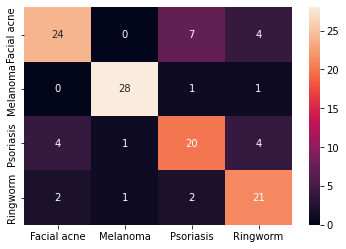

In [273]:
seaborn.heatmap(confusion_matrix_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
# seaborn.heatmap(confusion_matrix_data,annot=True)

In [274]:
printClassList()

0 -->  Facial acne
1 -->  Melanoma
2 -->  Psoriasis
3 -->  Ringworm


In [275]:
classification_report_data=classification_report(predicted_values,Testing_Labels,target_names=classes_list)

In [276]:
print(classification_report_data)

              precision    recall  f1-score   support

 Facial acne       0.80      0.69      0.74        35
    Melanoma       0.93      0.93      0.93        30
   Psoriasis       0.67      0.69      0.68        29
    Ringworm       0.70      0.81      0.75        26

    accuracy                           0.78       120
   macro avg       0.77      0.78      0.77       120
weighted avg       0.78      0.78      0.78       120

